# Session 9

In [1]:
import pandas as pd
import numpy as np

#### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the array with the null values replaced.



In [2]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,   None]])
df

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


We can fill NA entries with a single value, such as zero:

In [3]:
df

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


In [4]:
df.fillna( 0 ,inplace=False) #True

,0,1,2
0,1.0,0.0,2.0
1,2.0,3.0,5.0
2,0.0,4.0,0.0


We can specify a forward-fill to propagate the previous value forward:

In [5]:
df

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


In [6]:
# forward-fill
df.fillna(method='ffill')

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,2.0,4.0,5.0


Or we can specify a back-fill to propagate the next values backward:

In [7]:
df

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


In [8]:
# back-fill
df.fillna(method='bfill')

,0,1,2
0,1.0,3.0,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


For ``DataFrame``s, the options are similar, but we can also specify an ``axis`` along which the fills take place:

In [9]:
df

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


Task

1- Create dataframe with 3 rows 3 columns and put nulls

2- drop rows with nulls

3-  drop columns with nulls

4- fill nulls in your data by forwardfill

**Bonus**

5- Fill using mean of column

In [11]:
df

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


In [10]:
df.mean()

0    1.5
1    3.5
2    3.5
dtype: float64

In [12]:
df.fillna(df.mean())

,0,1,2
0,1.0,3.5,2.0
1,2.0,3.0,5.0
2,1.5,4.0,3.5


### Useful Pandas functions:

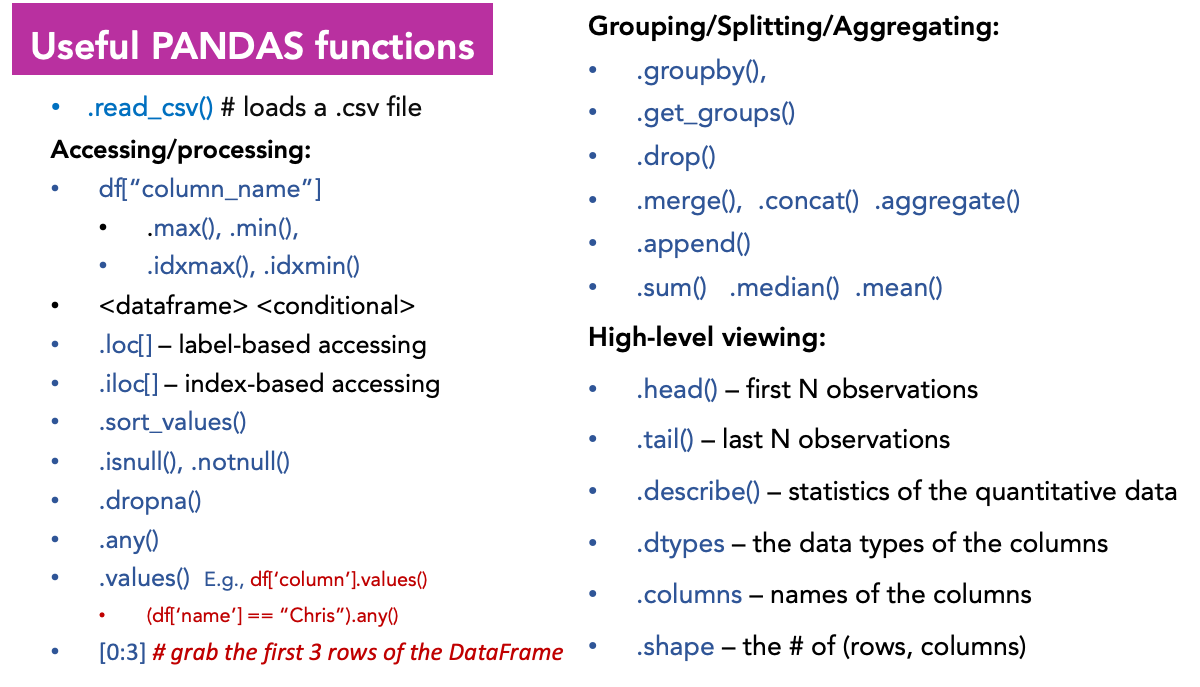

(source: https://harvard-iacs.github.io/2020-CS109A/)

## 7 Other Functions in pandas

### 1- Importing Data



In [16]:
path = 'movies.csv'
data = pd.read_csv(path)
data

,title,rating,year,runtime
0,Almost Famous,R,2000,122.0
1,American Pie,R,1999,95.0
2,Back to the Future,PG,1985,116.0
3,Blade Runner,R,1982,117.0
4,Blood for Dracula,R,1974,106.0
5,Blue Velvet,R,1986,120.0
6,The Breakfast Club,R,1985,97.0
7,Clueless,PG-13,1995,NaN
8,Cool Hand Luke,GP,1967,127.0
9,The Craft,R,1996,101.0


In [ ]:
pd.read_excel(filename)	#From an Excel file    .xlsx format

### 2- Viewing/Inspecting (exploring) Data

In [17]:
df = data.copy()   # copy because not to overwrite orignial data

In [ ]:
# df = data     # Forbidden

In [18]:
df.head() #First n rows of the DataFrame

,title,rating,year,runtime
0,Almost Famous,R,2000,122.0
1,American Pie,R,1999,95.0
2,Back to the Future,PG,1985,116.0
3,Blade Runner,R,1982,117.0
4,Blood for Dracula,R,1974,106.0


In [19]:
df.tail() #Last n rows of the DataFrame

,title,rating,year,runtime
25,Psycho,R,1960,NaN
26,Stand by Me,R,1986,89.0
27,Super 8,PG-13,2011,112.0
28,superbad,R,2007,113.0
29,WarGames,PG,1983,114.0


In [22]:
df.sample(5)

,title,rating,year,runtime
22,Pee-wee's Big Adventure,PG,1985,91.0
27,Super 8,PG-13,2011,112.0
3,Blade Runner,R,1982,117.0
24,The Princess Bride,PG,1987,98.0
11,el Topo,Not Rated,1970,125.0


In [23]:
df.shape   #Number of rows and columns

(30, 4)

In [24]:
df.info() #Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    30 non-null     object 
 1   rating   30 non-null     object 
 2   year     30 non-null     int64  
 3   runtime  28 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [25]:
df['rating'].value_counts() # calculate every unique values

rating
R            12
PG            8
PG-13         6
GP            1
Not Rated     1
NC-17         1
G             1
Name: count, dtype: int64

In [26]:
df['rating'].value_counts(normalize =True)

rating
R            0.400000
PG           0.266667
PG-13        0.200000
GP           0.033333
Not Rated    0.033333
NC-17        0.033333
G            0.033333
Name: proportion, dtype: float64

R rating is the most repeated

task

1- read dataframe

2- display information

3- print last 5 rows

4- print shape of it

5- value counts for categorical features (column)

In [27]:
df.nunique()

title      30
rating      7
year       22
runtime    24
dtype: int64

### 3- Statistics

In [28]:
df.sample()

,title,rating,year,runtime
21,Napoleon Dynamite,PG,2004,96.0


In [29]:
df['rating'].value_counts()

rating
R            12
PG            8
PG-13         6
GP            1
Not Rated     1
NC-17         1
G             1
Name: count, dtype: int64

In [32]:
df.describe(include='all')   #Summary statistics for all columns

,title,rating,year,runtime
count,30,30,30.000000,28.000000
unique,30,7,NaN,NaN
top,Almost Famous,R,NaN,NaN
freq,1,12,NaN,NaN
mean,NaN,NaN,1987.000000,107.285714
std,NaN,NaN,12.406895,21.308766
min,NaN,NaN,1960.000000,85.000000
25%,NaN,NaN,1982.250000,96.750000
50%,NaN,NaN,1986.000000,102.000000
75%,NaN,NaN,1995.750000,114.500000


**Insights**

- 1- title feature has 30 values with 30 unique values
- 2- Rating Feature has 30 values with 7 unique values
- 3- Rating Feature has the most freq value is R with 12 times
- 4- min and max of year feature is 1960 and 2011 respectively.
- 5- runtime feature has 28 values with 2 missing nulls.
- 6- the average of time of movies is almost 107 mintues
- 7- the shortest movie is 85 minute with it is name  .....
- 8- the longest movie with 197 mintue is .....

task 1 :

apply this 4 insights on Ecommerce data 

Task  2 :

1- find the shortest and longest movie name



In [33]:
df['runtime'].min()

85.0

In [34]:
df[ df['runtime'] == df['runtime'].min() ]

,title,rating,year,runtime
12,Evil Dead,NC-17,1981,85.0


In [35]:
df[df['runtime'] == df['runtime'].max() ]

,title,rating,year,runtime
10,Doctor Zhivago,PG-13,1965,197.0


Task

2- which movie is the oldest and newest

In [36]:
df[df['year'] == df['year'].min() ]

,title,rating,year,runtime
25,Psycho,R,1960,NaN


In [37]:
df[df['year'] == df['year'].max() ]

,title,rating,year,runtime
27,Super 8,PG-13,2011,112.0


In [38]:
df['runtime'].mean()	#Returns the mean of all columns

107.28571428571429

In [39]:
df['runtime'].count()	#Returns the number of non-null values in each DataFrame column

28

In [40]:
df['runtime'].max()	#Returns the highest value in each column

197.0

In [41]:
df['runtime'].min()	#Returns the lowest value in each column

85.0

In [42]:
df['runtime'].median()	#Returns the median of each column

102.0

In [43]:
df['runtime'].std()	#Returns the standard deviation of each column

21.308765615668406

In [44]:
df.corr(numeric_only=True)	#Returns the correlation between columns in a DataFrame

,year,runtime
year,1.000000,-0.450278
runtime,-0.450278,1.000000


- -1 <   < 1

- 1   positive corr >> f1 increase f2 increase

- -1  negative corr >> f1 incr  f2 decr

- 0   no relation 